# **Capstone: Predicting Mortality by Heart Disease with Neural Networks**

### Introduction:
Hello! This notebook can be used to navigate the code for this capstone. <br>
Before you get into anything else, change the file location of the csv file in the CsvFileHolder class below to the file location on your machine, then run the cell. <br>
This file contains the data that will be used to train and test the neural network. <br>
Once that's done, run each code section to interact!

In [21]:
class CsvFileHolder:
    def __init__(self):
        self = self
    def get_csvFile(self):
        '''
        CHANGE THE BELOW STRING TO THE CSV FILE LOCATION ON YOUR MACHINE, THEN RUN THIS CELL. 
        '''
        csvFile = 'C:/Users/Conner/Desktop/heart_failure_clinical_records_dataset.csv'
        return (csvFile)

### Neural Network Code:
Run the code below to train the neural network on the data, see the accuracy, and save the neural network. (Takes around 5 seconds) <br>
Each time the code is ran, the accuracy will be slightly different, as is the nature of stochastic gradient descent. (Accuracy is generally between 75 and 80%)


In [24]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PowerTransformer

'''
read the csv file with pandas, split it up into test and training sets. 
'''
csvFile = CsvFileHolder().get_csvFile()
df = pd.read_csv(csvFile, skiprows = 1)
dataset = df.values
X = dataset[:,0:11].astype(float)
Y = dataset[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= False)

'''
Need to scale the data, because one of the attributes, platelets, is in the hundred thousands, while the rest
of the data is below or around 100, and this wildly throws off the neural networks accuracy. 
I tried a number of data scalers, StandardScaler, RobustScaler, MinMaxScaler, and found that 
PowerTransformer with the method yeo-johnson, yielded the best results.
'''
def scale_datasets(x_train, x_test):
  scaler = PowerTransformer(method ="yeo-johnson")
  x_train_scaled = pd.DataFrame(
      scaler.fit_transform(x_train),)
  x_test_scaled = pd.DataFrame(
      scaler.transform(x_test),)
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

'''
The neural network itself, the number of layers, and neurons for these layers may seem random, but I used KerasTuner to find the optimal 
configuration, and this is what it returned. 
Activations on the hidden layers are relu, because I found relu works the best for this problem. Activation on the output layers is sigmoid 
because the output needs to be between 0 and 1. Uses stochastic gradient descent as an optimizer. 
'''
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,)),
    tf.keras.layers.Dense(320, activation=tf.nn.relu),
	  tf.keras.layers.Dense(448, activation=tf.nn.relu),
    tf.keras.layers.Dense(384, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
     ])

sgd = tf.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=50, batch_size=10, verbose = 0)
'''
Evaluating the data with the set aside test values returns the accuracy with which
this neural network can perform binary classification. 
Also saves the neural network, so it can be used below to predict with unique data. 
'''
test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose = 0)

print('Test accuracy:', test_acc * 100)
model.save("model.h5")


Test accuracy: 73.33333492279053


## Test the Neural Network with Unique Data:
Run the code below, then fill out the input values as prompted at the top of the notebook, to get a prediction. <br>
Some sample values to test: <br>
Should return live prediction: [45, 0, 2413, 0, 38, 0, 140000, 1.4, 140,1,1]<br>
Should return die prediction: [95, 1, 371, 0, 30, 0, 461000, 2, 132, 1, 0]<br>

In [22]:
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import PowerTransformer
import pandas as pd
'''
Loads the model, declares two variables l1 and d1, which are known to consistently be predicted 'live' and 'die' respectively. 
'''
model = load_model('model.h5')

l1 = [50, 0, 196, 0, 45, 0, 395000, 1.6, 136, 1,1]
d1 = [75, 0, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0]
'''
Asks the user to input the unique values that they want the neural network to predict with. 
Validates the input for each value. 
'''
def form():

  while True: 
      try: 
        age = int(input("Enter Patient's Age: "))
      except ValueError:
        print("Please enter a valid age (integer).")
        continue
      else:
        break
  while True:
    try:
      anaemia = int(input("Does the patient have anaemia?: (0/1 for no/yes)"))
    except ValueError:
        print("Please enter a valid value (integer).")
        continue
    else:
        break
  while True:
    try:
      creatinine_phosphokinase = float(input("Enter patient's creatinine phosphokinase level: "))
    except ValueError:
        print("Please enter a valid value (float).")
        continue
    else:
        break
  while True:
    try:
      diabetes = int(input("Does the patient have Diabetes?: (0/1 for no/yes)"))
    except ValueError:
        print("Please enter a valid value (integer).")
        continue
    else:
        break
  while True:
    try:
      ejection_fraction = float(input("Enter the patients ejection fraction level: "))
    except ValueError:
        print("Please enter a valid value (float).")
        continue
    else:
        break
  while True:
    try:
      high_blood_pressure = int(input("Does the patient have high blood pressure?: (0/1 for no/yes)"))
    except ValueError:
        print("Please enter a valid value (integer).")
        continue
    else:
        break
  while True:
    try:
      platelets = float(input("Enter the patient's platelet count: "))
    except ValueError:
        print("Please enter a valid value (float).")
        continue
    else:
        break
  while True:
    try:
      serum_creatinine = float(input("Enter the patient's serum creatinine levels: "))
    except ValueError:
        print("Please enter a valid value (float).")
        continue
    else:
        break
  while True:
    try:
      serum_sodium = float(input("Enter the patients serum sodium levels: "))
    except ValueError:
        print("Please enter a valid value (float).")
        continue
    else:
        break
  while True:
    try:
      sex = int(input ("Enter the patient's sex: (0/1 for m/f)"))
    except ValueError:
        print("Please enter a valid value (integer).")
        continue
    else:
        break
  while True:
    try:
      smoking = int(input ("Does the patient smoke?: (0/1 for no/yes"))
    except ValueError:
        print("Please enter a valid value (integer).")
        continue
    else:
        break

  print("Age: ", age, "Anaemia: " , anaemia, "Creatinine Phosphokinase: " ,  creatinine_phosphokinase,"Diabetes: " ,  diabetes,"Ejection Fraction: " , ejection_fraction,
  "High Blood Pressure: " , high_blood_pressure, "Platelets: " , platelets,"Serum Creatinine: " ,  serum_creatinine,"Serum Sodium: " ,  serum_sodium,"Sex: " ,  sex,"Smoking: " , smoking)

  form_array = np.array([age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking])
  return form_array

live_low = np.array(l1)
death_high = np.array(d1)
'''
Scales the input so the neural network can predict with greater accuracy. 
When not scaled, the plateletes value throws everything off because it is so much higher than the other values. 
'''
def scale_input(x_train):
    power_transformer_scaler = PowerTransformer(method = "yeo-johnson", standardize= True)
    x_train_scaled = power_transformer_scaler.fit_transform(x_train[:, np.newaxis])
    return x_train_scaled

x_train_scaled = scale_input(form())
live_low_scaled = scale_input(live_low)
death_high_scaled = scale_input(death_high)

'''
Reshapes the data to a shape that the neural network can process. 
'''

x_train_scaled1 = np.reshape(x_train_scaled, (-1, 11))
live_low_scaled1 = np.reshape(live_low_scaled, (-1, 11))
death_high_scaled1 = np.reshape(death_high_scaled, (-1, 11))

'''
Uses the neural network to predict if the patient will live or die based on the input.
Uses the variables live_low_scaled1 and death_high_scaled1 to calibrate whether to predict live or die.
This is neccessary because the value of this variable changes everytime the neural network is run due to the nature of stochastic gradient descent. 
'''
live_prediction = model.predict(live_low_scaled1)
death_prediction = model.predict(death_high_scaled1)
prediction = model.predict(x_train_scaled1)
live_die_var = (live_prediction[0][0] + death_prediction[0][0])/2

prediction1 = list(map(lambda x: 0 if x<live_die_var else 1, prediction))
def result():
    if (prediction1[0] == 1):
        print("NEURAL NETWORK PREDICTION: The patient is predicted to die.")
    if (prediction1[0] == 0):
        print("NEURAL NETWORK PREDICTION: The patient is predicted to live.")    
result()

Age:  45 Anaemia:  0 Creatinine Phosphokinase:  196.0 Diabetes:  0 Ejection Fraction:  45.0 High Blood Pressure:  0 Platelets:  395000.0 Serum Creatinine:  1.6 Serum Sodium:  136.0 Sex:  1 Smoking:  1
NEURAL NETWORK PREDICTION: The patient is predicted to live.


# Descriptive Data Table
Run the code below to see a table describing the data the neural network will be trained and tested on.

In [18]:
from beautifultable import BeautifulTable
'''
Creates a table based on the patient data that the neural network will be trained on.
Shows mean, standard deviation, min, max, and percentiles of the dataset. 
These values were predicted seperately. 
'''
table = BeautifulTable(maxwidth = 120)
table.rows.append(["Mean",              60.8,  0.43, 582,  0.42, 38.1, 0.35, 263000,  1.39, 137,  0.65, 0.34]) #Mean
table.rows.append(["Std. \nDeviation",  11.9,  0.5,  969,  0.49, 11.8, 0.48, 97600, 1.03, 4.41, 0.48, 0.45]) #Standard Deviation
table.rows.append(["Minimum",           40,    0,    23,   0,    14,   0,    25100, 0.5,  113,  0,    0]) #Minimum
table.rows.append(["Maximum",           95,    1,    7861, 1,    80,   1,    850000,  9.4,  148,  1,    1]) #Maximum
table.rows.append(["25th \npercentile", 51,    0,    115,  0,    30,   0,    212000,  0.9,  134,  0,    0]) #25th percentile
table.rows.append(["50th \npercentile", 60,    0,    250,  0,    38,   0,    262000,  1.1,  137,  1,    0]) #50th percentile
table.rows.append(["75th \npercentile", 70,    1,    582,  1,    45,   1,    304000,  1.4,  140,  1,    1]) #75th percentile
table.columns.header = [" ", "Age","Anaemia","Creatinine \nPhosphokinase","Diabetes","Ejection \nFraction", "High Blood \nPressure", "Platelets", 
"Serum \nCreatinine", "Serum \nSodium", "Sex", "Smoking"]
table.columns.width = [12, 6, 9, 15, 10, 11, 13, 11, 12, 8, 6, 9]
print(table)



+------------+------+---------+---------------+----------+-----------+-------------+-----------+------------+--------+------+---------+
|            | Age  | Anaemia |  Creatinine   | Diabetes | Ejection  | High Blood  | Platelets |   Serum    | Serum  | Sex  | Smoking |
|            |      |         | Phosphokinase |          | Fraction  |  Pressure   |           | Creatinine | Sodium |      |         |
+------------+------+---------+---------------+----------+-----------+-------------+-----------+------------+--------+------+---------+
|    Mean    | 60.8 |  0.43   |      582      |   0.42   |   38.1    |    0.35     |  263000   |    1.39    |  137   | 0.65 |  0.34   |
+------------+------+---------+---------------+----------+-----------+-------------+-----------+------------+--------+------+---------+
|   Std.     | 11.9 |   0.5   |      969      |   0.49   |   11.8    |    0.48     |   97600   |    1.03    |  4.41  | 0.48 |  0.45   |
| Deviation  |      |         |               | 

# Data Distribution Histograms
Run the code below to see the histogram distributions of the data the neural network will be trained and tested on.


Text(0, 0.5, 'Frequency')

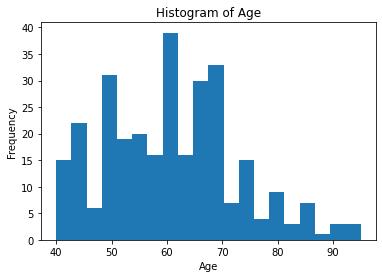

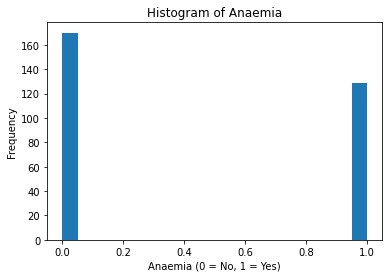

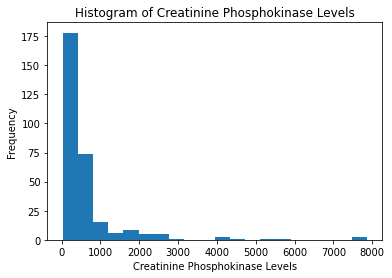

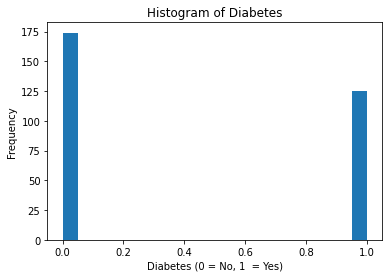

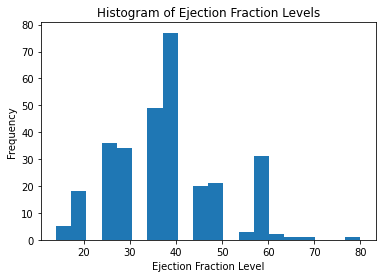

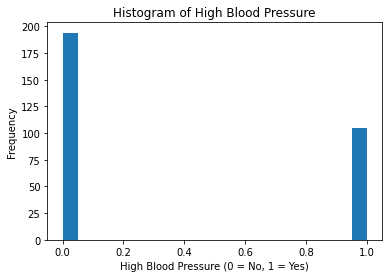

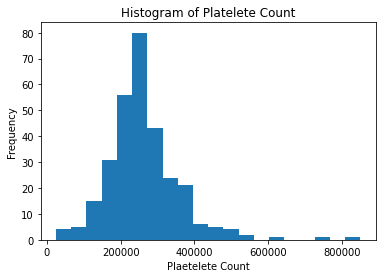

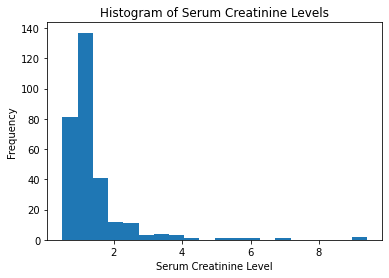

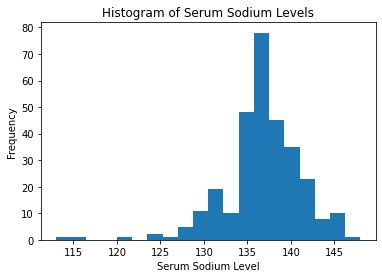

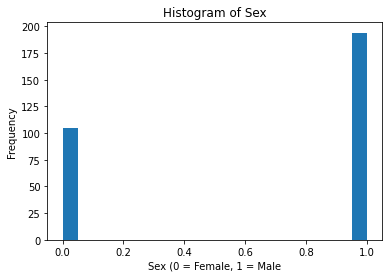

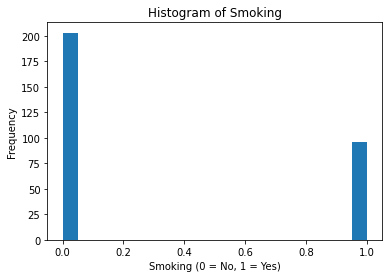

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd
'''
Gets each column of the csv file as a unique dataframe. 
'''
csvFile = CsvFileHolder().get_csvFile()
dfAge = pd.read_csv(csvFile, usecols = [0], low_memory = False)
dfAge1 = dfAge.to_numpy()
dfAnaemia = pd.read_csv(csvFile, usecols = [1], low_memory = False)
dfAnaemia1 = dfAnaemia.to_numpy()
dfCreP = pd.read_csv(csvFile, usecols = [2], low_memory = False)
dfCreP1 = dfCreP.to_numpy()
dfDiabetes = pd.read_csv(csvFile, usecols = [3], low_memory = False)
dfDiabetes1 = dfDiabetes.to_numpy()
dfEjectF = pd.read_csv(csvFile, usecols = [4], low_memory = False)
dfEjectF1 = dfEjectF.to_numpy()
dfHBP = pd.read_csv(csvFile, usecols = [5], low_memory = False)
dfHBP1 = dfHBP.to_numpy()
dfPlateletes = pd.read_csv(csvFile, usecols = [6], low_memory = False)
dfPlateletes1 = dfPlateletes.to_numpy()
dfSerC= pd.read_csv(csvFile, usecols = [7], low_memory = False)
dfSerC1 = dfSerC.to_numpy()
dfSerS = pd.read_csv(csvFile, usecols = [8], low_memory = False)
dfSerS1 = dfSerS.to_numpy()
dfSex = pd.read_csv(csvFile, usecols = [9], low_memory = False)
dfSex1 = dfSex.to_numpy()
dfSmoking = pd.read_csv(csvFile, usecols = [10], low_memory = False)
dfSmoking1 = dfSmoking.to_numpy()
n_bins = 20
'''
Sets up  10 different distribution histograms
'''
fig1, axs1 = plt.subplots(1, 1)
fig2, axs2 = plt.subplots(1, 1)
fig3, axs3 = plt.subplots(1, 1)
fig4, axs4 = plt.subplots(1, 1)
fig5, axs5 = plt.subplots(1, 1)
fig6, axs6 = plt.subplots(1, 1)
fig7, axs7 = plt.subplots(1, 1)
fig8, axs8 = plt.subplots(1, 1)
fig9, axs9 = plt.subplots(1, 1)
fig10, axs10 = plt.subplots(1, 1)
fig11, axs11 = plt.subplots(1, 1)
'''
Creates 10 different distribution histograms for each dataframe above. 
'''
axs1.hist(dfAge1, bins=n_bins)
axs1.set_title("Histogram of Age")
axs1.set_xlabel("Age")
axs1.set_ylabel("Frequency")
axs2.hist(dfAnaemia1, bins=n_bins)
axs2.set_title("Histogram of Anaemia")
axs2.set_xlabel("Anaemia (0 = No, 1 = Yes)")
axs2.set_ylabel("Frequency")
axs3.hist(dfCreP1, bins=n_bins)
axs3.set_title("Histogram of Creatinine Phosphokinase Levels")
axs3.set_xlabel("Creatinine Phosphokinase Levels")
axs3.set_ylabel("Frequency")
axs4.hist(dfDiabetes1, bins=n_bins)
axs4.set_title("Histogram of Diabetes")
axs4.set_xlabel("Diabetes (0 = No, 1  = Yes)")
axs4.set_ylabel("Frequency")
axs5.hist(dfEjectF1, bins=n_bins)
axs5.set_title("Histogram of Ejection Fraction Levels")
axs5.set_xlabel("Ejection Fraction Level")
axs5.set_ylabel("Frequency")
axs6.hist(dfHBP1, bins=n_bins)
axs6.set_title("Histogram of High Blood Pressure")
axs6.set_xlabel("High Blood Pressure (0 = No, 1 = Yes)")
axs6.set_ylabel("Frequency")
axs7.hist(dfPlateletes1, bins=n_bins)
axs7.set_title("Histogram of Platelete Count")
axs7.set_xlabel("Plaetelete Count")
axs7.set_ylabel("Frequency")
axs8.hist(dfSerC1, bins=n_bins)
axs8.set_title("Histogram of Serum Creatinine Levels")
axs8.set_xlabel("Serum Creatinine Level")
axs8.set_ylabel("Frequency")
axs9.hist(dfSerS1, bins=n_bins)
axs9.set_title("Histogram of Serum Sodium Levels")
axs9.set_xlabel("Serum Sodium Level")
axs9.set_ylabel("Frequency")
axs10.hist(dfSex1, bins=n_bins)
axs10.set_title("Histogram of Sex")
axs10.set_xlabel("Sex (0 = Female, 1 = Male")
axs10.set_ylabel("Frequency")
axs11.hist(dfSmoking1, bins =n_bins)
axs11.set_title("Histogram of Smoking")
axs11.set_xlabel("Smoking (0 = No, 1 = Yes)")
axs11.set_ylabel("Frequency")